The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this
assignment are as follows:

● Understand the basic Image Classification pipeline and the data-driven
approach (train/predict stages)

● Data fetching and understand the train/val/test splits.

● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5
points)

● Print the classification metric report (2.5 points)

● Implement and apply a deep neural network classifier including (feedforward
neural network, RELU activations) (5 points)

● Understand and be able to implement (vectorized) backpropagation (cost
stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

● Implement batch normalization for training the neural network (2.5 points)

● Understand the differences and trade-offs between traditional and NN
classifiers with the help of classification metrics (5 points)

In [1]:
import h5py
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [0]:
import tensorflow as tf
from sklearn.metrics import classification_report


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [0]:
f1 = h5py.File("/content/drive/My Drive/Colab folder/SVHN_single_grey1.h5",'r')
#print(list(f1.keys()))

In [8]:
print(list(f1.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
X_train = np.array(f1['X_train'])
X_test = np.array(f1['X_test'])
X_val = np.array(f1['X_val'])
y_test = np.array(f1['y_test'])
y_train = np.array(f1['y_train'])
y_val = np.array(f1['y_val'])

In [10]:
print(X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape)

(42000, 32, 32) (18000, 32, 32) (60000, 32, 32) (42000,) (18000,) (60000,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X_train.shape

(42000, 32, 32)

In [0]:
#nxtrainsamples, nxtrain1, nytrain1 = X_train.shape
#X_train_new = X_train.reshape((nxtrainsamples,nxtrain1*nytrain1))
#nxtestsamples, nxtest1, nytest1 = X_test.shape
#X_test_new = X_test.reshape((nxtestsamples,28*28))

#nytainsamples, nxtrain2, nytrain2 = y_train.shape
#y_train_new = y_train.reshape((nytrainsamples,nxtrain2*nytrain2))
#nytestsamples, nxtest2, nytest2 = y_test.shape
#y_test_new = y_test.reshape((nytestsamples,nxtest2*nytest2))

#nvalsxsamples, nxtrain3, nytrain3 = X_val.shape
#X_val_new = X_val.reshape((nvalsxsamples,28*28))
#nvalsysamples, nxtest3, nytest3 = y_val.shape
#y_val_new = y_val.reshape((nvalsysamples,nxtest3*nytest3))

In [0]:
nxtrainsamples, nxtrain1, nytrain1 = X_train.shape
X_train_new = X_train.reshape((nxtrainsamples,nxtrain1*nytrain1))
nxtestsamples, nxtest1, nytest1 = X_test.shape
X_test_new = X_test.reshape((nxtestsamples,nxtest1*nytest1))

#nytainsamples, nxtrain2, nytrain2 = y_train.shape
#y_train_new = y_train.reshape((nytrainsamples,nxtrain2*nytrain2))
#nytestsamples, nxtest2, nytest2 = y_test.shape
#y_test_new = y_test.reshape((nytestsamples,nxtest2*nytest2))

nvalsxsamples, nxtrain3, nytrain3 = X_val.shape
X_val_new = X_val.reshape((nvalsxsamples,nxtrain3*nytrain3))
#nvalsysamples, nxtest3, nytest3 = y_val.shape
#y_val_new = y_val.reshape((nvalsysamples,nxtest3*nytest3))

In [14]:
print(X_val_new.shape)

(60000, 1024)


In [15]:
import cv2

#Create a resized dataset for training and testing inputs with corresponding size. Here we are resizing it to 28X28 (same input size as MNIST)
x_train_res = np.zeros((X_train.shape[0],28,28), dtype=np.float32)
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  x_train_res[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

x_test_res = np.zeros((X_test.shape[0],28,28), dtype=np.float32)
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  x_test_res[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

x_val_res = np.zeros((X_val.shape[0],28,28), dtype=np.float32)
for i in range(X_val.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  x_val_res[i,:,:] = cv2.resize(X_val[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
#We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
#del x_train
#del x_test

print(x_train_res.shape)
print(x_test_res.shape)


(42000, 28, 28)
(18000, 28, 28)


In [0]:
for i in range(1,10,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  modelknn = knn.fit(X_train_new,y_train)
  predknn = knn.predict(X_test_new)
  w= metrics.accuracy_score(predknn,y_test)
  print(classification_report(y_test, predknn))
  print (i,w)

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

    accuracy                           0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000

1 0.45916666666666667
              precision    recall  f1-score   support

           0       0.34      0.68      0.46      1814
           1       0.40      0.71      0.52      1828
           2       0.49      0.54      0.51      1803
  

In [0]:
#y_pred_new = knn.predict(X_test_new)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.43      0.68      0.52      1814
           1       0.46      0.73      0.56      1828
           2       0.57      0.55      0.56      1803
           3       0.42      0.41      0.42      1719
           4       0.64      0.63      0.64      1812
           5       0.49      0.38      0.43      1768
           6       0.49      0.40      0.44      1832
           7       0.73      0.60      0.66      1808
           8       0.45      0.34      0.39      1812
           9       0.56      0.39      0.46      1804

    accuracy                           0.51     18000
   macro avg       0.52      0.51      0.51     18000
weighted avg       0.52      0.51      0.51     18000



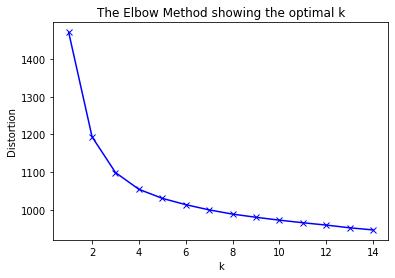

In [0]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_new)
    distortions.append(sum(np.min(cdist(X_train_new, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_new.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
kmean_y_pred = kmeanModel.predict(X_test_new)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, kmean_y_pred))

              precision    recall  f1-score   support

           0       0.15      0.07      0.10      1814
           1       0.14      0.05      0.07      1828
           2       0.16      0.04      0.07      1803
           3       0.09      0.10      0.10      1719
           4       0.10      0.06      0.07      1812
           5       0.11      0.12      0.11      1768
           6       0.09      0.09      0.09      1832
           7       0.11      0.11      0.11      1808
           8       0.10      0.08      0.09      1812
           9       0.10      0.11      0.11      1804
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0

    accuracy                           0.08     18000
   macro avg       0.08      0.06      0.07     18000
weighted avg       0.12      0.08      0.09     18000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


from the above elbow curve optimal K is 5

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)
valy = tf.keras.utils.to_categorical(y_val, num_classes=10)

model without Batch normalization


In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#model.add(tf.keras.layers.BatchNormalization())

In [19]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))

#model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
#model.add(tf.keras.layers.BatchNormalization())
#Dropout layer
#model.add(tf.keras.layers.Dropout(0.5))

#Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [24]:
%time
#Training on the dataset
model.fit(x_train_res, trainY,
          batch_size=batch_size,
          epochs=96,
          verbose=1,
          validation_data=(x_val_res, valy))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs
Train on 42000 samples, validate on 60000 samples
Epoch 1/96
42000/42000 [==============================] - 3s 71us/sample - loss: nan - acc: 0.0995 - val_loss: nan - val_acc: 0.1000
Epoch 2/96
42000/42000 [==============================] - 3s 62us/sample - loss: nan - acc: 0.0997 - val_loss: nan - val_acc: 0.1000
Epoch 3/96
42000/42000 [==============================] - 3s 61us/sample - loss: nan - acc: 0.0997 - val_loss: nan - val_acc: 0.1000
Epoch 4/96
42000/42000 [==============================] - 3s 61us/sample - loss: nan - acc: 0.0997 - val_loss: nan - val_acc: 0.1000
Epoch 5/96
42000/42000 [==============================] - 3s 61us/sample - loss: nan - acc: 0.0997 - val_loss: nan - val_acc: 0.1000
Epoch 6/96
42000/42000 [==============================] - 3s 62us/sample - loss: nan - acc: 0.0997 - val_loss: nan - val_acc: 0.1000
Epoch 7/96
42000/42000 [==============================] - 3s 61us/sample - loss: nan - a

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
Output (Dense)               (None, 10)                3

In [37]:
valy.shape

(60000, 10)

model with batch normalization

In [0]:
#Initialize Sequential model
model_2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_2.add(tf.keras.layers.BatchNormalization())

In [0]:
tf.keras.backend.clear_session()
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model_2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Hidden layers
model_2.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))

model_2.add(tf.keras.layers.BatchNormalization())

model_2.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model_2.add(tf.keras.layers.BatchNormalization())
#Dropout layer
model_2.add(tf.keras.layers.Dropout(0.5))

#Hidden layers
model_2.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model_2.add(tf.keras.layers.Dropout(0.3))

In [0]:
#Output layer
model_2.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
%time
#Training on the dataset
model_2.fit(x_train_res, trainY,
          batch_size=batch_size,
          epochs=96,
          verbose=1,
          validation_data=(x_val_res, valy))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
Train on 42000 samples, validate on 60000 samples
Epoch 1/96
42000/42000 [==============================] - 5s 126us/sample - loss: 2.4945 - acc: 0.1280 - val_loss: 2.1566 - val_acc: 0.2315
Epoch 2/96
42000/42000 [==============================] - 4s 106us/sample - loss: 2.2286 - acc: 0.1906 - val_loss: 1.9694 - val_acc: 0.3414
Epoch 3/96
42000/42000 [==============================] - 4s 106us/sample - loss: 2.0732 - acc: 0.2517 - val_loss: 1.7809 - val_acc: 0.4383
Epoch 4/96
42000/42000 [==============================] - 4s 105us/sample - loss: 1.9073 - acc: 0.3206 - val_loss: 1.5940 - val_acc: 0.5124
Epoch 5/96
42000/42000 [==============================] - 4s 106us/sample - loss: 1.7657 - acc: 0.3755 - val_loss: 1.4551 - val_acc: 0.5522
Epoch 6/96
42000/42000 [==============================] - 5s 109us/sample - loss: 1.6461 - acc: 0.4252 - val_loss: 1.3469 - val_acc: 0.5839
Epoch 7/96
42000/42000 [========================

In [52]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

Based on our experimentation of various classification mechanisms both classical as well through Deep Neural Networks, we may reach the conclusion that DNNs are quite efficient for image classification.

Metrics show accuracy to be sub par i.e. below 50% for classical ML KNN models whereas they show a healthy accuracy for tuned models around 84%